In [14]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

In [2]:
def compose_circuit(function: QuantumCircuit):
    """
    Compose a new circuit with the oracle and a circuit
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    
    qc.barrier()
    
    qc.compose(function, inplace=True)

    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

In [20]:
def dj_algorithm(function: QuantumCircuit):
    """
    Finds if an the oracle is constant or balanced
    """
    qc = compose_circuit(function)

    display(qc.draw(output='mpl'))

    result = AerSimulator().run(qc, shots=500, memory=True).result()
    measurements = result.get_memory()
    
    #print(measurements)

    if "1" in measurements[0]:
        return "Balanced oracle"
    else:        
        return "Constant oracle"

In [4]:
def constant_oracle():
    qc = QuantumCircuit(4)
    qc.x(3)

    return qc

In [5]:
def balanced_oracle():
    qc = QuantumCircuit(4)
    qc.x([0, 1, 2])
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.x([0, 1, 2])

    return qc

Constant oracle:


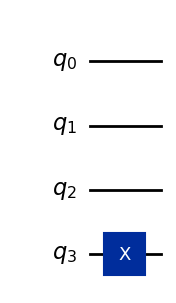

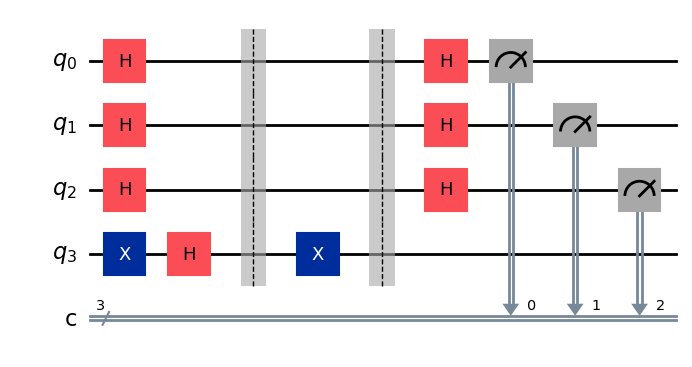

'Constant oracle'

In [28]:
f_constant = constant_oracle()

print("Constant oracle:")
display(f_constant.draw("mpl"))
display(dj_algorithm(f_constant))

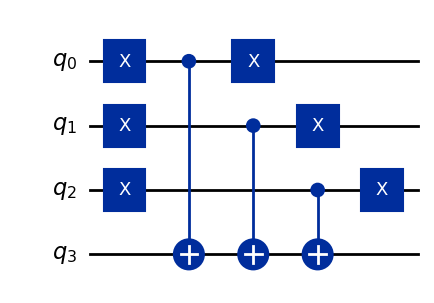

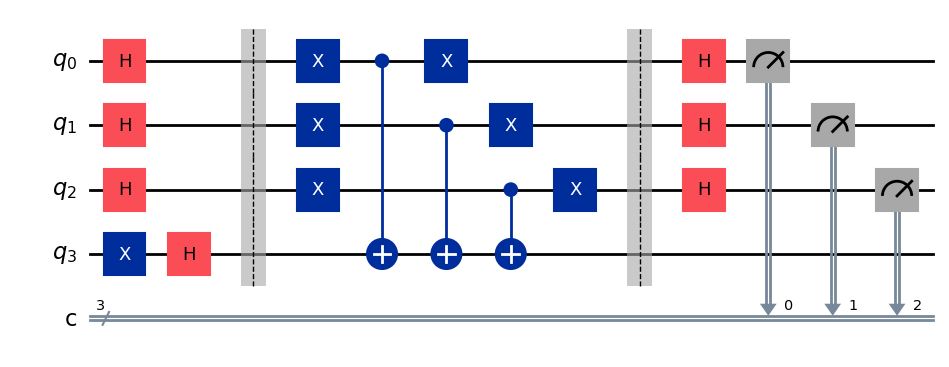

'Balanced oracle'

In [21]:
f_balanced = balanced_oracle()
display(f_balanced.draw("mpl"))
display(dj_algorithm(f_balanced))

In [22]:
def other_balanced_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)  # CNOT with qubit 0 as control and qubit 3 as target
    return qc


Balanced oracle:


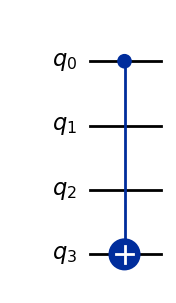

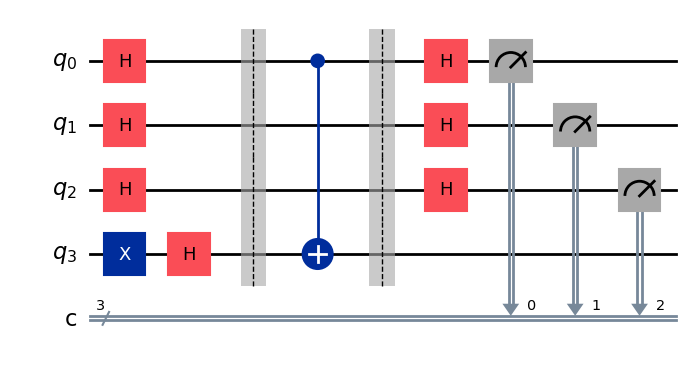

'Balanced oracle'

In [23]:
f_balanced = other_balanced_oracle()
print("\nBalanced oracle:")
display(f_balanced.draw("mpl"))
display(dj_algorithm(f_balanced))

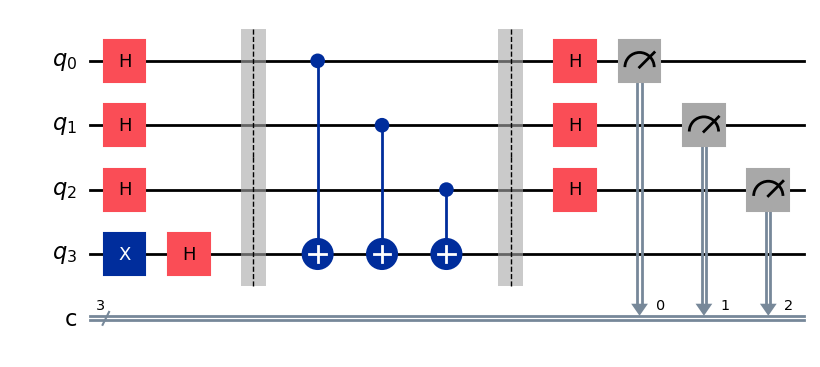

Balanced oracle


In [24]:
def varied_balanced_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)  # CNOT con qubit 0 como control y qubit 3 como objetivo
    qc.cx(1, 3)  # CNOT con qubit 1 como control y qubit 3 como objetivo
    qc.cx(2, 3)  # CNOT con qubit 2 como control y qubit 3 como objetivo
    return qc

result = dj_algorithm(varied_balanced_oracle())
print(result)

In [25]:
def some_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)
    qc.x(0)
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.x(1)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.x(2)
    qc.cx(2, 3)

    return qc
    

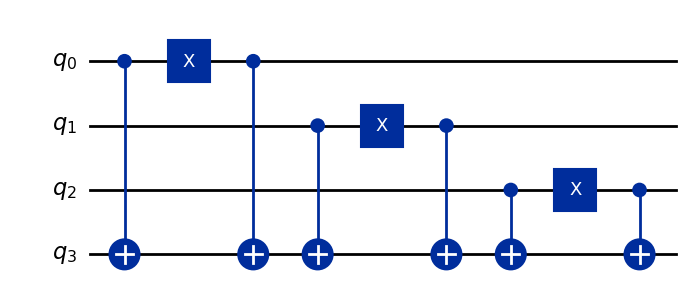

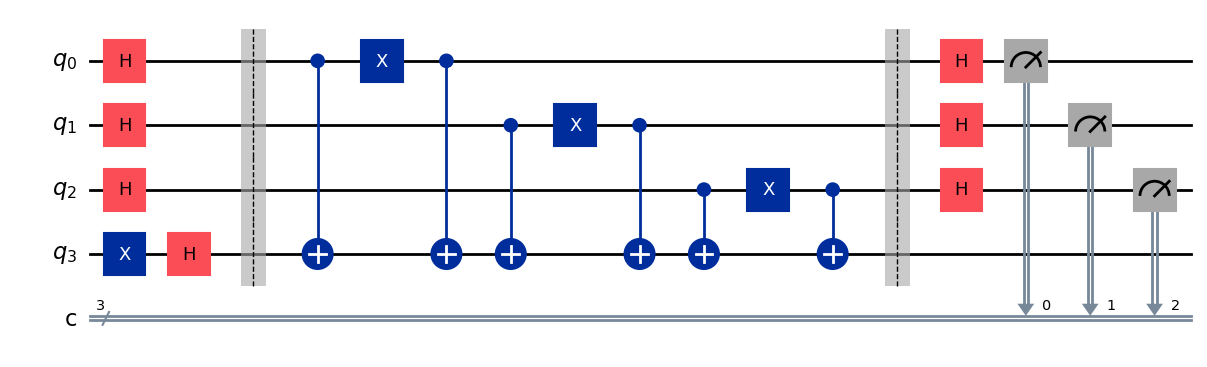

'Constant oracle'

In [26]:
f= some_oracle()
display(f.draw("mpl"))
display(dj_algorithm(f))

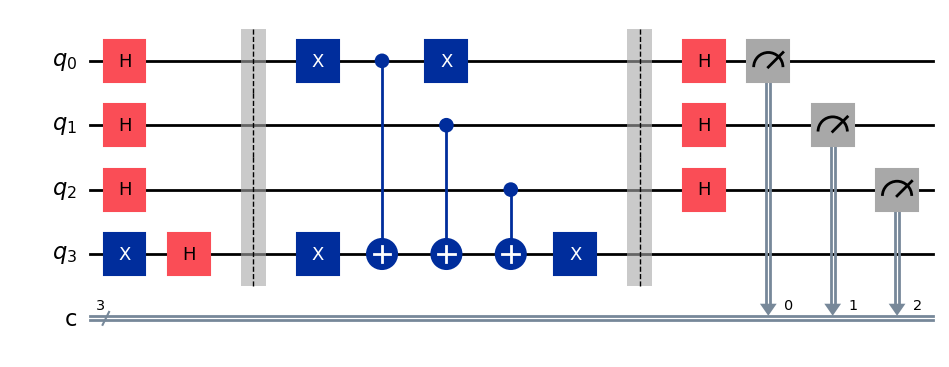

Balanced oracle


In [27]:
def eval_oracle_1():
    nqubits = 4
    oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')
    
    # Balanced oracle
    b = np.random.randint(1,2**nqubits-1)
    b_str = format(b, '0'+str(nqubits-1)+'b')
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle.x(qubit)
    
    for qubit in range(nqubits-1):
        oracle.cx(qubit, nqubits-1)
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle.x(qubit)
    return oracle

result = dj_algorithm(eval_oracle_1())
print(result)

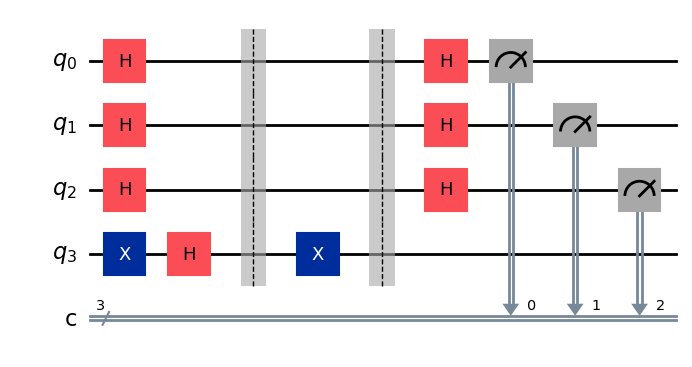

Constant oracle


In [29]:
def eval_oracle_2():
    nqubits = 4
    oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')
    
    # Constant oracle
    if np.random.randint(2) == 1:
        oracle.x(nqubits-1)
    
    return oracle

result = dj_algorithm(eval_oracle_2())
print(result)